#### Concept

עצי החלטה הם שיטת למידה בפיקוח לא פרמטרית המשמשת הן למשימות סיווג והן למשימות רגרסיה. עצי החלטה הם מודל לקבלת החלטה  במבנה דמוי עץ, בו צמתים פנימיים מייצגים בדיקות על תכונות, ענפים מייצגים את תוצאת המבחן, וצמתים עלים מייצגים את התחזית הסופית (תווית או ערך מחלקה).

לסיווג, עצי ההחלטה משתמשים במדדים כמו אנטרופיה או אנטרופיה של ג'יני כדי לפצל את הנתונים:
- אנטרופיה של ג'יני: מודד את הסבירות לסיווג שגוי של אלמנט שנבחר באופן אקראי.
- אנטרופיה (רווח מידע): מודד את כמות אי הוודאות.

לגבי רגרסיה, עצי ההחלטה ממזערת את השונות (שגיאה בריבוע ממוצע) בפיצולים.

#### דוגמא ליישום
נניח שיש לנו מערך נתונים עם תכונות כמו גיל, הכנסה ומצב סטודנטים כדי לחזות אם אדם קונה מחשב.

Accuracy: 0.0
Confusion Matrix:
[[0 0]
 [2 0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       0.0
           1       0.00      0.00      0.00       2.0

    accuracy                           0.00       2.0
   macro avg       0.00      0.00      0.00       2.0
weighted avg       0.00      0.00      0.00       2.0



/Users/shay_ziv/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/shay_ziv/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


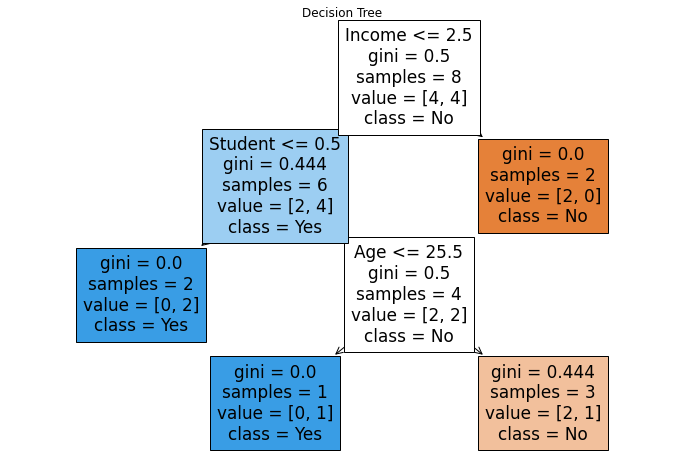

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt

# Example data
data = {
    'Age': [25, 45, 35, 50, 23, 37, 32, 28, 40, 27],
    'Income': ['High', 'High', 'High', 'Medium', 'Low', 'Low', 'Low', 'Medium', 'Low', 'Medium'],
    'Student': ['No', 'No', 'No', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No'],
    'Buys_Computer': ['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes']
}
df = pd.DataFrame(data)

# Convert categorical features to numeric
df['Income'] = df['Income'].map({'Low': 1, 'Medium': 2, 'High': 3})
df['Student'] = df['Student'].map({'No': 0, 'Yes': 1})
df['Buys_Computer'] = df['Buys_Computer'].map({'No': 0, 'Yes': 1})

# Independent variables (features) and dependent variable (target)
X = df[['Age', 'Income', 'Student']]
y = df['Buys_Computer']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Creating and training the decision tree model
model = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)
model.fit(X_train, y_train)

# Making predictions
y_pred = model.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{class_report}")

# Plotting the decision tree
plt.figure(figsize=(12,8))
plot_tree(model, feature_names=['Age', 'Income', 'Student'], class_names=['No', 'Yes'], filled=True)
plt.title('Decision Tree')
plt.show()

#### Explanation of the Code

1. Libraries: We import necessary libraries like numpy, pandas, sklearn, and matplotlib.
2. Data Preparation: We create a DataFrame containing features and the target variable. Categorical features are converted to numeric values.
3. Feature and Target: We separate the features (Age, Income, Student) and the target (Buys_Computer).
4. Train-Test Split: We split the data into training and testing sets.
5. Model Training: We create a DecisionTreeClassifier model, specifying the criterion (Gini impurity) and maximum depth of the tree, and train it using the training data.
6. Predictions: We use the trained model to predict whether a person buys a computer for the test set.
7. Evaluation: Evaluate the model using accuracy, confusion matrix, and classification report.
8. Visualization: Plot decision tree to visualize the decision-making process.


#### Evaluation Metrics

- Accuracy

- Confusion Matrix: Shows the counts of true positives, true negatives, false positives, and false negatives.

- Classification Report: Provides precision, recall, F1-score, and support for each class.
